In [1]:
import sys

sys.path.append('/home/yzy/bioSIMS/code/analysis')
import cv2
from utils import *
sys.path.append('/home/yzy/software2/FINCH-Clustering/python/')
# print(sys.path)
from finch import FINCH

Using TensorFlow backend.
/home/yzy/software2/FINCH-Clustering/python/finch.py:13: UserWarning: pyflann not installed: No module named 'index'
  warnings.warn('pyflann not installed: {}'.format(e))


In [2]:
low_dir = '/home/yzy/bioSIMS/data/process/mouse0_liver0_neg1_low0_div10_None_ada/preprocess/'
low_mat_file = 'test_samples_691.mat'
low_matters_list_file = 'matters_candidate.pkl'

high_dir = '/home/yzy/bioSIMS/data/process/mouse0_liver0_pos1_high1_None_ada/preprocess/'
high_mat_file = 'test_samples_200.mat'
high_matters_list_file = 'matters_candidate.pkl'

test_sample_low = sio.loadmat(low_dir+low_mat_file)['test_samples']
test_sample_high = sio.loadmat(high_dir+high_mat_file)['test_samples']
matters_list_low = pickle.load(open(low_dir+low_matters_list_file,'rb'))
matters_list_high = pickle.load(open(high_dir+high_matters_list_file,'rb'))
matters_list_low = np.array(matters_list_low)
matters_list_high = np.array(matters_list_high)

In [3]:
def get_img(matter,test_sample_all,matter_list,mode='None'):
    if mode=='median':
        test_sample_all = (test_sample_all+1)/(np.percentile(test_sample_all,50,axis=1,keepdims=True)+1)
    elif mode=='total':
        test_sample_all = (test_sample_all)/np.sum(test_sample_all,axis=1,keepdims=True)
    else:
        pass
        
    return test_sample_all[:,matter_list==matter].reshape(256,256)

<IPython.core.display.Javascript object>


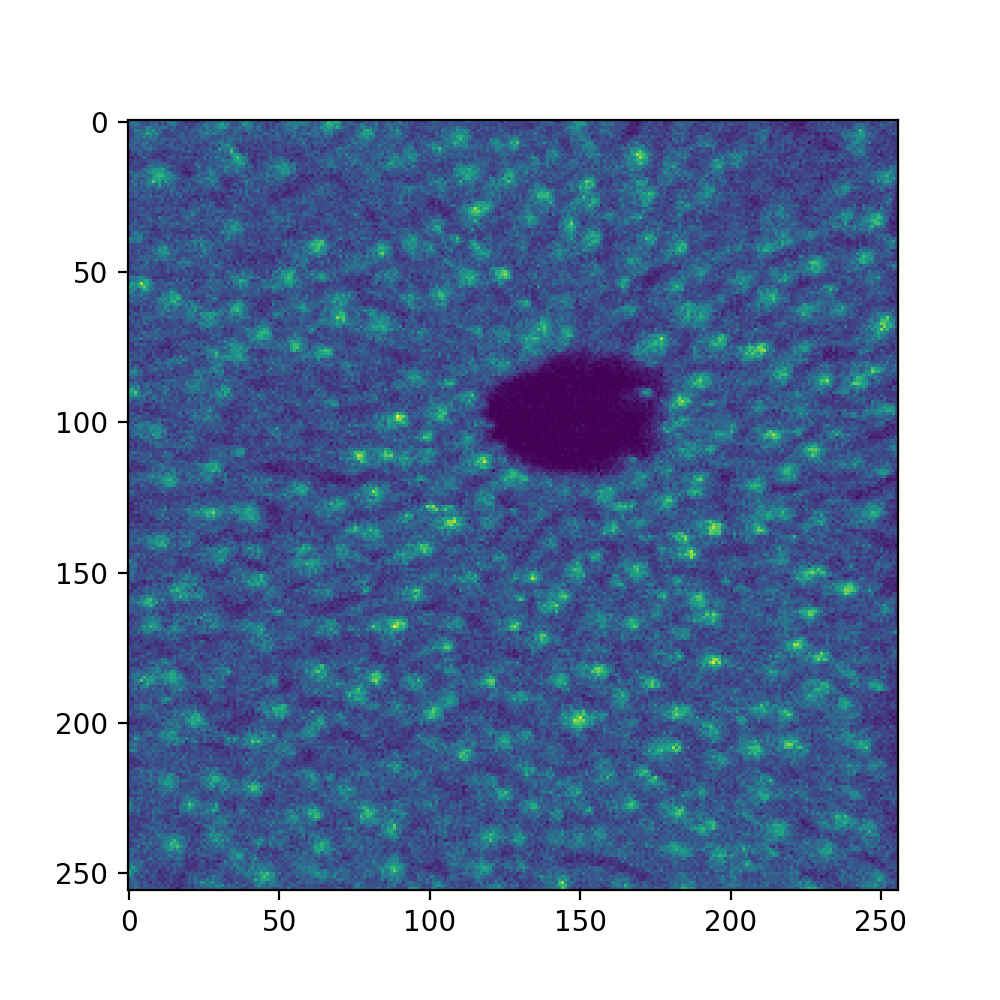

In [8]:
%matplotlib notebook
plt.figure(figsize=(5,5))
to_show = get_img(134.04,test_sample_low,matters_list_low)
plt.imshow(to_show)

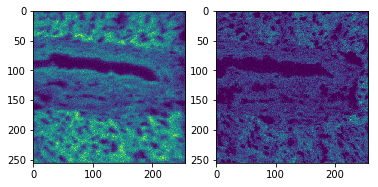

In [42]:
plt.subplot(1,2,1)
low_img = get_img(87.00,test_sample_low,matters_list_low)
low_img2 = get_img(86.96,test_sample_low,matters_list_low)
plt.imshow(low_img+low_img2)
plt.subplot(1,2,2)
high_img = get_img(87.49,test_sample_high,matters_list_high)
plt.imshow(high_img)
plt.show()

In [34]:
low_img.ravel().shape

(65536,)

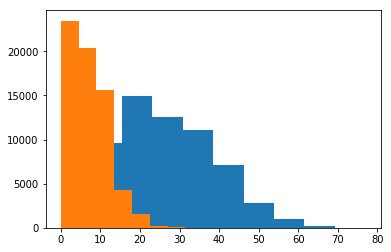

In [45]:
plt.hist(low_img.ravel()+low_img2.ravel())
plt.hist(high_img.ravel())
plt.show()

In [46]:
wasserstein_distance(low_img.ravel(),high_img.ravel())

10.451690673828125

In [47]:
wasserstein_distance(low_img.ravel()+low_img2.ravel(),high_img.ravel())

18.521286010742188

In [61]:
data_X_high = np.transpose(test_sample_high)
data_X_low = np.transpose(test_sample_low)

data_X = np.transpose(np.hstack([test_sample_high,test_sample_low]))
data_Y = np.hstack([np.zeros(shape=(test_sample_high.shape[1])),np.ones(shape=(test_sample_low.shape[1]))])

In [138]:
umap_embed = umap.UMAP(metric='correlation',min_dist=0,n_neighbors=5).fit_transform(data_X_high)
# pred_y = SIMLR(umap_embed,4)
c, num_clust, req_c = FINCH(umap_embed, initial_rank=None, req_clust=None, distance='euclidean', verbose=True)
# pred_y = hdbscan.HDBSCAN(min_cluster_size=5).fit_predict(umap_embed)

Partition 0: 69 clusters
Partition 1: 22 clusters
Partition 2: 21 clusters


In [139]:
pred_y = c[:,2]

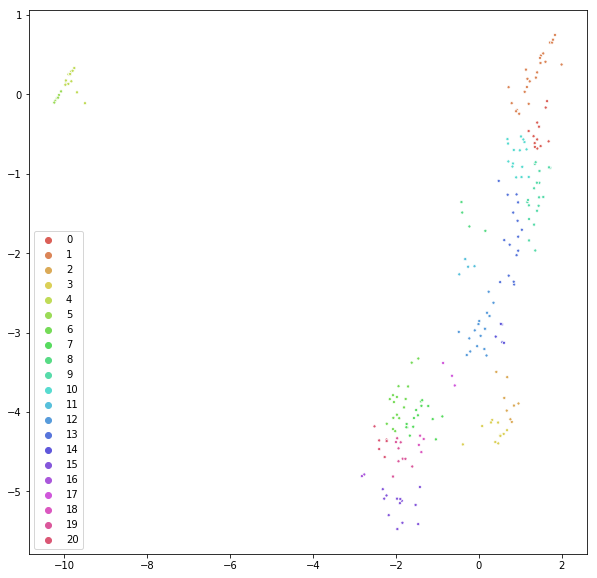

In [140]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=umap_embed[:,0],y=umap_embed[:,1],hue=pred_y,s=10,palette=sns.hls_palette(np.unique(pred_y).shape[0]))

# sns.scatterplot(x=umap_embed[:,0],y=umap_embed[:,1],hue=data_Y,s=10)
plt.show()

In [132]:
# low########################
# euc
# 1：底板
# 2:87系列+核
# 3:纤维化
# 4:特强
# 5:乱七八糟


# cos
# -1:杂乱
# 0:


# correlation
# 1:mast cell
# 2:底板
# 3:101系列／脂肪酸
# 4：核



# high########################
# hdbscan
# 0:底板
# 1:非底板

# SIMLR4
# 1:101
# 2:底板
# 3:核
# 4:纤维化
    
    
# FINCH
# 0:
matters_list_high[pred_y==1]

array([ 51.36,  53.37,  55.38,  57.38,  58.39,  59.39,  63.36,  63.97,
        69.43,  71.45,  73.46,  79.41,  80.42,  81.45,  85.51,  86.48,
        87.49,  89.49,  90.49,  95.52,  96.51,  97.5 , 101.56, 102.5 ,
       103.51, 105.54, 106.55, 112.55, 117.58, 118.59, 121.6 , 123.62,
       128.57, 129.66, 131.65, 132.64, 133.66, 134.68, 135.66, 139.67,
       141.71, 142.67, 143.64, 144.62, 145.67, 146.66, 147.69, 149.67,
       150.72, 151.72, 153.75, 157.72, 158.7 , 159.66, 160.7 , 161.71,
       163.74, 165.66, 167.77, 173.76, 175.76, 177.73, 180.73, 181.68,
       183.74, 185.81, 191.82, 193.82, 198.74, 199.75, 200.83, 201.82,
       205.83, 208.88, 211.9 , 213.89, 215.8 , 217.87, 221.86, 223.88,
       225.92, 230.91, 231.92, 241.94, 243.91, 245.84, 254.04, 256.18,
       259.91, 261.87, 267.94, 275.89, 277.88, 280.21, 282.25, 284.09,
       296.03, 300.1 , 301.97, 304.16, 307.98, 314.04, 317.96, 319.98,
       324.  , 336.04, 339.99, 344.05, 346.04, 356.07, 358.09, 360.01,
      

In [161]:
a = '12345'
a[1:3]

'23'

In [174]:
tmp_file = '/home/yzy/bioSIMS/tmp/jj.txt'
com_file = '/home/yzy/bioSIMS/tmp/com_jj.txt'

line_threshold = 46
rst_str=''
with open(tmp_file,'r') as f:
    i=0
    last_col_1='          '
    last_col_2='          '
    for line in f:
        
        
        if i>=line_threshold:
            cur_col_1 = line[17:27]
            cur_col_2 = line[31:41]
#             print(cur_col_1)
            if cur_col_1.strip()!='':
#                 print(cur_col_1)
                last_col_1=cur_col_1
            else:
#                 print(last_col_1)
                
                cur_col_1=last_col_1
            if cur_col_2.strip()!='':
                last_col_2=cur_col_2
            else:
                cur_col_2=last_col_2
                
            cur_str = line[0:17]+cur_col_1+line[27:31]+cur_col_2+line[41:]
#             print(line[17:27])
#             print(line[31:41])
            rst_str+=cur_str
            print(cur_str)
        else:
            rst_str+=line
            
            
        i+=1
with open(com_file,'w') as f:
    f.write(rst_str)

         0.000	             	  4.147e+001 	

         0.032	  4.550e+001 	  4.147e+001 	

         0.066	  4.550e+001 	  4.147e+001 	

         0.103	  4.550e+001 	  4.147e+001 	

         0.130	  4.550e+001 	  4.147e+001 	

         0.160	  4.550e+001 	  4.147e+001 	

         0.194	  4.550e+001 	  4.147e+001 	

         0.225	  4.550e+001 	  4.147e+001 	

         0.258	  4.550e+001 	  4.146e+001 	

         0.289	  4.550e+001 	  4.146e+001 	

         0.353	  4.550e+001 	  4.147e+001 	

         0.418	  4.550e+001 	  4.147e+001 	

         0.449	  4.550e+001 	  4.147e+001 	

         0.482	  4.550e+001 	  4.147e+001 	

         0.513	  4.550e+001 	  4.147e+001 	

         0.546	  4.550e+001 	  4.148e+001 	

         0.577	  4.550e+001 	  4.148e+001 	

         0.610	  4.550e+001 	  4.148e+001 	

         0.641	  4.550e+001 	  4.148e+001 	

         0.674	  4.550e+001 	  4.148e+001 	

         0.705	  4.550e+001 	  4.148e+001 	

         0.738	  4.550e+001 	  4.148e+001 	

         0

        57.857	  4.550e+001 	  4.068e+001 	

        57.888	  4.550e+001 	  4.068e+001 	

        57.921	  4.550e+001 	  4.068e+001 	

        57.952	  4.550e+001 	  4.068e+001 	

        57.985	  4.550e+001 	  4.067e+001 	

        58.016	  4.550e+001 	  4.067e+001 	

        58.049	  4.550e+001 	  4.067e+001 	

        58.080	  4.550e+001 	  4.067e+001 	

        58.113	  4.550e+001 	  4.066e+001 	

        58.144	  4.550e+001 	  4.066e+001 	

        58.208	  4.550e+001 	  4.066e+001 	

        58.272	  4.550e+001 	  4.065e+001 	

        58.337	  4.550e+001 	  4.065e+001 	

        58.368	  4.550e+001 	  4.065e+001 	

        58.401	  4.550e+001 	  4.064e+001 	

        58.432	  4.550e+001 	  4.064e+001 	

        58.465	  4.550e+001 	  4.064e+001 	

        58.496	  4.550e+001 	  4.064e+001 	

        58.529	  4.550e+001 	  4.063e+001 	

        58.560	  4.550e+001 	  4.063e+001 	

        58.593	  4.550e+001 	  4.062e+001 	

        58.624	  4.550e+001 	  4.062e+001 	

        58

       128.577	  4.580e+001 	  4.067e+001 	

       128.608	  4.580e+001 	  4.067e+001 	

       128.641	  4.580e+001 	  4.067e+001 	

       128.672	  4.580e+001 	  4.067e+001 	

       128.705	  4.580e+001 	  4.068e+001 	

       128.736	  4.580e+001 	  4.068e+001 	

       128.769	  4.580e+001 	  4.068e+001 	

       128.800	  4.580e+001 	  4.068e+001 	

       128.833	  4.580e+001 	  4.068e+001 	

       128.864	  4.580e+001 	  4.068e+001 	

       128.928	  4.580e+001 	  4.068e+001 	

       128.992	  4.580e+001 	  4.068e+001 	

       129.056	  4.580e+001 	  4.068e+001 	

       129.057	  4.580e+001 	  4.068e+001 	

       129.121	  4.580e+001 	  4.068e+001 	

       129.152	  4.580e+001 	  4.068e+001 	

       129.185	  4.580e+001 	  4.067e+001 	

       129.216	  4.580e+001 	  4.067e+001 	

       129.249	  4.580e+001 	  4.067e+001 	

       129.280	  4.580e+001 	  4.067e+001 	

       129.313	  4.580e+001 	  4.067e+001 	

       129.344	  4.580e+001 	  4.067e+001 	

       129

       201.856	  4.540e+001 	  4.109e+001 	

       201.889	  4.540e+001 	  4.109e+001 	

       201.920	  4.540e+001 	  4.109e+001 	

       201.953	  4.540e+001 	  4.109e+001 	

       201.984	  4.530e+001 	  4.109e+001 	

       202.048	  4.530e+001 	  4.110e+001 	

       202.112	  4.530e+001 	  4.110e+001 	

       202.113	  4.530e+001 	  4.110e+001 	

       202.176	  4.530e+001 	  4.110e+001 	

       202.240	  4.530e+001 	  4.110e+001 	

       202.241	  4.530e+001 	  4.111e+001 	

       202.305	  4.530e+001 	  4.111e+001 	

       202.336	  4.530e+001 	  4.111e+001 	

       202.369	  4.530e+001 	  4.111e+001 	

       202.400	  4.530e+001 	  4.111e+001 	

       202.433	  4.530e+001 	  4.111e+001 	

       202.464	  4.530e+001 	  4.111e+001 	

       202.497	  4.530e+001 	  4.111e+001 	

       202.528	  4.530e+001 	  4.111e+001 	

       202.561	  4.530e+001 	  4.112e+001 	

       202.592	  4.530e+001 	  4.112e+001 	

       202.625	  4.530e+001 	  4.112e+001 	

       202

       276.768	  4.560e+001 	  4.142e+001 	

       276.832	  4.560e+001 	  4.142e+001 	

       276.896	  4.560e+001 	  4.142e+001 	

       276.897	  4.560e+001 	  4.141e+001 	

       276.960	  4.560e+001 	  4.141e+001 	

       277.024	  4.560e+001 	  4.140e+001 	

       277.025	  4.560e+001 	  4.140e+001 	

       277.089	  4.560e+001 	  4.139e+001 	

       277.120	  4.560e+001 	  4.139e+001 	

       277.153	  4.560e+001 	  4.139e+001 	

       277.184	  4.560e+001 	  4.139e+001 	

       277.217	  4.560e+001 	  4.138e+001 	

       277.248	  4.560e+001 	  4.138e+001 	

       277.281	  4.560e+001 	  4.138e+001 	

       277.312	  4.560e+001 	  4.138e+001 	

       277.345	  4.560e+001 	  4.137e+001 	

       277.376	  4.560e+001 	  4.137e+001 	

       277.408	  4.560e+001 	  4.136e+001 	

       277.440	  4.560e+001 	  4.136e+001 	

       277.473	  4.560e+001 	  4.135e+001 	

       277.504	  4.570e+001 	  4.135e+001 	

       277.537	  4.570e+001 	  4.134e+001 	

       277


       353.344	  4.680e+001 	  4.172e+001 	

       353.345	  4.680e+001 	  4.172e+001 	

       353.409	  4.680e+001 	  4.173e+001 	

       353.473	  4.680e+001 	  4.174e+001 	

       353.504	  4.680e+001 	  4.174e+001 	

       353.537	  4.680e+001 	  4.174e+001 	

       353.568	  4.680e+001 	  4.174e+001 	

       353.601	  4.680e+001 	  4.175e+001 	

       353.632	  4.680e+001 	  4.175e+001 	

       353.665	  4.680e+001 	  4.175e+001 	

       353.696	  4.680e+001 	  4.175e+001 	

       353.729	  4.680e+001 	  4.175e+001 	

       353.760	  4.680e+001 	  4.175e+001 	

       353.795	  4.680e+001 	  4.176e+001 	

       353.824	  4.680e+001 	  4.176e+001 	

       353.857	  4.680e+001 	  4.176e+001 	

       353.888	  4.680e+001 	  4.176e+001 	

       353.952	  4.680e+001 	  4.176e+001 	

       354.016	  4.680e+001 	  4.176e+001 	

       354.017	  4.680e+001 	  4.175e+001 	

       354.080	  4.680e+001 	  4.175e+001 	

       354.144	  4.680e+001 	  4.175e+001 	

       35

       431.041	  4.770e+001 	  4.223e+001 	

       431.072	  4.770e+001 	  4.223e+001 	

       431.136	  4.770e+001 	  4.223e+001 	

       431.200	  4.770e+001 	  4.223e+001 	

       431.264	  4.770e+001 	  4.223e+001 	

       431.328	  4.770e+001 	  4.223e+001 	

       431.329	  4.770e+001 	  4.224e+001 	

       431.392	  4.770e+001 	  4.225e+001 	

       431.456	  4.770e+001 	  4.226e+001 	

       431.521	  4.770e+001 	  4.227e+001 	

       431.552	  4.770e+001 	  4.227e+001 	

       431.585	  4.770e+001 	  4.229e+001 	

       431.616	  4.770e+001 	  4.229e+001 	

       431.649	  4.770e+001 	  4.230e+001 	

       431.680	  4.770e+001 	  4.230e+001 	

       431.713	  4.770e+001 	  4.232e+001 	

       431.744	  4.770e+001 	  4.232e+001 	

       431.777	  4.770e+001 	  4.234e+001 	

       431.808	  4.770e+001 	  4.234e+001 	

       431.841	  4.770e+001 	  4.235e+001 	

       431.872	  4.770e+001 	  4.235e+001 	

       431.936	  4.770e+001 	  4.237e+001 	

       432


       512.736	  4.750e+001 	  4.353e+001 	

       512.769	  4.750e+001 	  4.352e+001 	

       512.800	  4.750e+001 	  4.352e+001 	

       512.833	  4.750e+001 	  4.352e+001 	

       512.864	  4.750e+001 	  4.352e+001 	

       512.897	  4.750e+001 	  4.352e+001 	

       512.928	  4.760e+001 	  4.352e+001 	

       512.961	  4.760e+001 	  4.352e+001 	

       512.992	  4.760e+001 	  4.352e+001 	

       513.056	  4.760e+001 	  4.352e+001 	

       513.121	  4.760e+001 	  4.352e+001 	

       513.122	  4.760e+001 	  4.351e+001 	

       513.184	  4.760e+001 	  4.351e+001 	

       513.248	  4.760e+001 	  4.351e+001 	

       513.312	  4.760e+001 	  4.351e+001 	

       513.376	  4.760e+001 	  4.351e+001 	

       513.440	  4.760e+001 	  4.351e+001 	

       513.441	  4.760e+001 	  4.351e+001 	

       513.505	  4.760e+001 	  4.351e+001 	

       513.536	  4.760e+001 	  4.351e+001 	

       513.569	  4.760e+001 	  4.351e+001 	

       513.600	  4.760e+001 	  4.351e+001 	

       51


       595.297	  4.800e+001 	  4.416e+001 	

       595.361	  4.800e+001 	  4.416e+001 	

       595.362	  4.800e+001 	  4.416e+001 	

       595.425	  4.800e+001 	  4.416e+001 	

       595.489	  4.800e+001 	  4.416e+001 	

       595.554	  4.800e+001 	  4.416e+001 	

       595.585	  4.800e+001 	  4.416e+001 	

       595.618	  4.800e+001 	  4.416e+001 	

       595.649	  4.800e+001 	  4.416e+001 	

       595.682	  4.800e+001 	  4.415e+001 	

       595.713	  4.800e+001 	  4.415e+001 	

       595.746	  4.800e+001 	  4.415e+001 	

       595.777	  4.800e+001 	  4.415e+001 	

       595.841	  4.800e+001 	  4.415e+001 	

       595.905	  4.800e+001 	  4.415e+001 	

       595.969	  4.800e+001 	  4.415e+001 	

       596.033	  4.800e+001 	  4.416e+001 	

       596.097	  4.810e+001 	  4.416e+001 	

       596.161	  4.810e+001 	  4.416e+001 	

       596.225	  4.810e+001 	  4.416e+001 	

       596.226	  4.810e+001 	  4.415e+001 	

       596.289	  4.810e+001 	  4.415e+001 	

       59


       682.945	  4.810e+001 	  4.533e+001 	

       683.009	  4.810e+001 	  4.534e+001 	

       683.073	  4.810e+001 	  4.534e+001 	

       683.137	  4.810e+001 	  4.534e+001 	

       683.138	  4.810e+001 	  4.534e+001 	

       683.202	  4.810e+001 	  4.534e+001 	

       683.233	  4.810e+001 	  4.534e+001 	

       683.266	  4.810e+001 	  4.534e+001 	

       683.296	  4.810e+001 	  4.534e+001 	

       683.330	  4.810e+001 	  4.535e+001 	

       683.361	  4.810e+001 	  4.535e+001 	

       683.425	  4.810e+001 	  4.535e+001 	

       683.489	  4.810e+001 	  4.534e+001 	

       683.553	  4.810e+001 	  4.534e+001 	

       683.617	  4.810e+001 	  4.534e+001 	

       683.681	  4.810e+001 	  4.534e+001 	

       683.682	  4.810e+001 	  4.533e+001 	

       683.745	  4.810e+001 	  4.533e+001 	

       683.809	  4.810e+001 	  4.533e+001 	

       683.873	  4.810e+001 	  4.532e+001 	

       683.937	  4.810e+001 	  4.532e+001 	

       684.002	  4.810e+001 	  4.531e+001 	

       68


       770.849	  4.910e+001 	  4.544e+001 	

       770.914	  4.910e+001 	  4.543e+001 	

       770.945	  4.910e+001 	  4.543e+001 	

       770.976	  4.910e+001 	  4.543e+001 	

       771.008	  4.910e+001 	  4.543e+001 	

       771.073	  4.910e+001 	  4.543e+001 	

       771.137	  4.910e+001 	  4.543e+001 	

       771.201	  4.910e+001 	  4.543e+001 	

       771.265	  4.910e+001 	  4.543e+001 	

       771.266	  4.910e+001 	  4.543e+001 	

       771.328	  4.910e+001 	  4.543e+001 	

       771.329	  4.910e+001 	  4.543e+001 	

       771.393	  4.910e+001 	  4.543e+001 	

       771.457	  4.910e+001 	  4.544e+001 	

       771.521	  4.910e+001 	  4.544e+001 	

       771.585	  4.910e+001 	  4.545e+001 	

       771.648	  4.910e+001 	  4.545e+001 	

       771.714	  4.910e+001 	  4.545e+001 	

       771.744	  4.910e+001 	  4.545e+001 	

       771.777	  4.910e+001 	  4.546e+001 	

       771.808	  4.910e+001 	  4.546e+001 	

       771.873	  4.910e+001 	  4.546e+001 	

       77


       863.776	  4.970e+001 	  4.614e+001 	

       863.777	  4.970e+001 	  4.614e+001 	

       863.840	  4.970e+001 	  4.614e+001 	

       863.904	  4.970e+001 	  4.615e+001 	

       863.968	  4.970e+001 	  4.615e+001 	

       864.032	  4.970e+001 	  4.615e+001 	

       864.096	  4.970e+001 	  4.615e+001 	

       864.097	  4.970e+001 	  4.615e+001 	

       864.160	  4.970e+001 	  4.615e+001 	

       864.192	  4.970e+001 	  4.615e+001 	

       864.256	  4.970e+001 	  4.614e+001 	

       864.320	  4.970e+001 	  4.613e+001 	

       864.321	  4.970e+001 	  4.613e+001 	

       864.384	  4.970e+001 	  4.612e+001 	

       864.448	  4.970e+001 	  4.611e+001 	

       864.512	  4.970e+001 	  4.610e+001 	

       864.576	  4.970e+001 	  4.608e+001 	

       864.640	  4.970e+001 	  4.608e+001 	

       864.642	  4.970e+001 	  4.607e+001 	

       864.704	  4.970e+001 	  4.606e+001 	

       864.768	  4.970e+001 	  4.606e+001 	

       864.769	  4.970e+001 	  4.605e+001 	

       86


       957.568	  5.050e+001 	  4.600e+001 	

       957.572	  5.050e+001 	  4.602e+001 	

       957.632	  5.050e+001 	  4.603e+001 	

       957.696	  5.050e+001 	  4.603e+001 	

       957.697	  5.050e+001 	  4.604e+001 	

       957.760	  5.040e+001 	  4.606e+001 	

       957.824	  5.040e+001 	  4.607e+001 	

       957.888	  5.040e+001 	  4.608e+001 	

       957.889	  5.040e+001 	  4.608e+001 	

       957.952	  5.040e+001 	  4.609e+001 	

       958.016	  5.040e+001 	  4.609e+001 	

       958.017	  5.040e+001 	  4.609e+001 	

       958.080	  5.040e+001 	  4.610e+001 	

       958.144	  5.040e+001 	  4.610e+001 	

       958.208	  5.040e+001 	  4.610e+001 	

       958.209	  5.040e+001 	  4.610e+001 	

       958.304	  5.040e+001 	  4.610e+001 	

       958.368	  5.040e+001 	  4.610e+001 	

       958.432	  5.040e+001 	  4.610e+001 	

       958.433	  5.040e+001 	  4.610e+001 	

       958.496	  5.040e+001 	  4.609e+001 	

       958.560	  5.040e+001 	  4.609e+001 	

       95

      1056.800	  5.050e+001 	  4.677e+001 	

      1056.864	  5.050e+001 	  4.677e+001 	

      1056.928	  5.050e+001 	  4.676e+001 	

      1056.992	  5.050e+001 	  4.676e+001 	

      1056.993	  5.050e+001 	  4.676e+001 	

      1057.056	  5.050e+001 	  4.676e+001 	

      1057.057	  5.050e+001 	  4.675e+001 	

      1057.120	  5.050e+001 	  4.675e+001 	

      1057.153	  5.050e+001 	  4.675e+001 	

      1057.216	  5.060e+001 	  4.675e+001 	

      1057.280	  5.060e+001 	  4.675e+001 	

      1057.281	  5.060e+001 	  4.675e+001 	

      1057.344	  5.060e+001 	  4.675e+001 	

      1057.345	  5.060e+001 	  4.675e+001 	

      1057.408	  5.060e+001 	  4.676e+001 	

      1057.472	  5.060e+001 	  4.676e+001 	

      1057.536	  5.060e+001 	  4.677e+001 	

      1057.600	  5.060e+001 	  4.677e+001 	

      1057.601	  5.060e+001 	  4.677e+001 	

      1057.664	  5.060e+001 	  4.678e+001 	

      1057.728	  5.060e+001 	  4.678e+001 	

      1057.792	  5.060e+001 	  4.678e+001 	

      1057

      1148.993	  5.040e+001 	  4.777e+001 	

      1149.056	  5.040e+001 	  4.778e+001 	

      1149.120	  5.040e+001 	  4.778e+001 	

      1149.121	  5.040e+001 	  4.779e+001 	

      1149.184	  5.040e+001 	  4.779e+001 	

      1149.248	  5.040e+001 	  4.780e+001 	

      1149.312	  5.040e+001 	  4.780e+001 	

      1149.313	  5.040e+001 	  4.780e+001 	

      1149.376	  5.040e+001 	  4.780e+001 	

      1149.440	  5.040e+001 	  4.780e+001 	

      1149.441	  5.040e+001 	  4.780e+001 	

      1149.504	  5.040e+001 	  4.780e+001 	

      1149.568	  5.030e+001 	  4.780e+001 	

      1149.601	  5.030e+001 	  4.780e+001 	

      1149.632	  5.030e+001 	  4.780e+001 	

      1149.665	  5.030e+001 	  4.780e+001 	

      1149.728	  5.030e+001 	  4.780e+001 	

      1149.792	  5.030e+001 	  4.780e+001 	

      1149.856	  5.030e+001 	  4.780e+001 	

      1149.920	  5.030e+001 	  4.781e+001 	

      1149.984	  5.030e+001 	  4.781e+001 	

      1149.985	  5.030e+001 	  4.782e+001 	

      1150

In [175]:
tmp_file = '/home/yzy/bioSIMS/tmp/jj.txt'
com_file = '/home/yzy/bioSIMS/tmp/com_jj.txt'

line_threshold = 45

with open(com_file,'r') as f:
    i=0
    for line in f:
        if i>=line_threshold:
            print(line)
        i+=1

  Timestamp   	  Channel A  	  Channel B  	

         0.000	             	  4.147e+001 	

         0.032	  4.550e+001 	  4.147e+001 	

         0.066	  4.550e+001 	  4.147e+001 	

         0.103	  4.550e+001 	  4.147e+001 	

         0.130	  4.550e+001 	  4.147e+001 	

         0.160	  4.550e+001 	  4.147e+001 	

         0.194	  4.550e+001 	  4.147e+001 	

         0.225	  4.550e+001 	  4.147e+001 	

         0.258	  4.550e+001 	  4.146e+001 	

         0.289	  4.550e+001 	  4.146e+001 	

         0.353	  4.550e+001 	  4.147e+001 	

         0.418	  4.550e+001 	  4.147e+001 	

         0.449	  4.550e+001 	  4.147e+001 	

         0.482	  4.550e+001 	  4.147e+001 	

         0.513	  4.550e+001 	  4.147e+001 	

         0.546	  4.550e+001 	  4.148e+001 	

         0.577	  4.550e+001 	  4.148e+001 	

         0.610	  4.550e+001 	  4.148e+001 	

         0.641	  4.550e+001 	  4.148e+001 	

         0.674	  4.550e+001 	  4.148e+001 	

         0.705	  4.550e+001 	  4.148e+001 	

         0

        58.529	  4.550e+001 	  4.063e+001 	

        58.560	  4.550e+001 	  4.063e+001 	

        58.593	  4.550e+001 	  4.062e+001 	

        58.624	  4.550e+001 	  4.062e+001 	

        58.657	  4.550e+001 	  4.061e+001 	

        58.688	  4.550e+001 	  4.061e+001 	

        58.721	  4.550e+001 	  4.061e+001 	

        58.752	  4.550e+001 	  4.061e+001 	

        58.785	  4.550e+001 	  4.061e+001 	

        58.816	  4.550e+001 	  4.061e+001 	

        58.849	  4.550e+001 	  4.061e+001 	

        58.880	  4.550e+001 	  4.061e+001 	

        58.913	  4.550e+001 	  4.061e+001 	

        58.944	  4.550e+001 	  4.061e+001 	

        59.008	  4.550e+001 	  4.061e+001 	

        59.072	  4.550e+001 	  4.062e+001 	

        59.074	  4.550e+001 	  4.062e+001 	

        59.137	  4.550e+001 	  4.062e+001 	

        59.168	  4.550e+001 	  4.062e+001 	

        59.201	  4.550e+001 	  4.063e+001 	

        59.232	  4.550e+001 	  4.063e+001 	

        59.265	  4.550e+001 	  4.064e+001 	

        59

       132.800	  4.570e+001 	  4.090e+001 	

       132.833	  4.570e+001 	  4.091e+001 	

       132.864	  4.570e+001 	  4.091e+001 	

       132.928	  4.570e+001 	  4.093e+001 	

       132.992	  4.570e+001 	  4.093e+001 	

       132.993	  4.570e+001 	  4.094e+001 	

       133.056	  4.570e+001 	  4.095e+001 	

       133.121	  4.570e+001 	  4.096e+001 	

       133.152	  4.570e+001 	  4.096e+001 	

       133.185	  4.570e+001 	  4.097e+001 	

       133.216	  4.570e+001 	  4.097e+001 	

       133.249	  4.570e+001 	  4.098e+001 	

       133.280	  4.560e+001 	  4.098e+001 	

       133.313	  4.560e+001 	  4.099e+001 	

       133.344	  4.560e+001 	  4.099e+001 	

       133.377	  4.560e+001 	  4.099e+001 	

       133.408	  4.560e+001 	  4.099e+001 	

       133.441	  4.560e+001 	  4.099e+001 	

       133.472	  4.560e+001 	  4.099e+001 	

       133.505	  4.560e+001 	  4.100e+001 	

       133.536	  4.560e+001 	  4.100e+001 	

       133.569	  4.560e+001 	  4.100e+001 	

       133

       207.905	  4.550e+001 	  4.109e+001 	

       207.936	  4.550e+001 	  4.109e+001 	

       207.969	  4.550e+001 	  4.109e+001 	

       208.000	  4.550e+001 	  4.109e+001 	

       208.033	  4.550e+001 	  4.108e+001 	

       208.064	  4.550e+001 	  4.108e+001 	

       208.097	  4.550e+001 	  4.108e+001 	

       208.128	  4.550e+001 	  4.108e+001 	

       208.161	  4.550e+001 	  4.108e+001 	

       208.192	  4.550e+001 	  4.108e+001 	

       208.225	  4.550e+001 	  4.108e+001 	

       208.256	  4.550e+001 	  4.108e+001 	

       208.289	  4.550e+001 	  4.108e+001 	

       208.320	  4.550e+001 	  4.108e+001 	

       208.353	  4.550e+001 	  4.108e+001 	

       208.384	  4.550e+001 	  4.108e+001 	

       208.417	  4.550e+001 	  4.108e+001 	

       208.448	  4.550e+001 	  4.108e+001 	

       208.512	  4.550e+001 	  4.108e+001 	

       208.576	  4.550e+001 	  4.108e+001 	

       208.578	  4.550e+001 	  4.108e+001 	

       208.640	  4.550e+001 	  4.108e+001 	

       208


       282.720	  4.590e+001 	  4.147e+001 	

       282.753	  4.590e+001 	  4.146e+001 	

       282.784	  4.590e+001 	  4.146e+001 	

       282.818	  4.590e+001 	  4.146e+001 	

       282.848	  4.590e+001 	  4.146e+001 	

       282.881	  4.590e+001 	  4.145e+001 	

       282.912	  4.590e+001 	  4.145e+001 	

       282.945	  4.590e+001 	  4.144e+001 	

       282.976	  4.590e+001 	  4.144e+001 	

       283.009	  4.590e+001 	  4.144e+001 	

       283.040	  4.590e+001 	  4.144e+001 	

       283.073	  4.590e+001 	  4.143e+001 	

       283.104	  4.590e+001 	  4.143e+001 	

       283.137	  4.590e+001 	  4.143e+001 	

       283.168	  4.590e+001 	  4.143e+001 	

       283.233	  4.590e+001 	  4.143e+001 	

       283.296	  4.590e+001 	  4.143e+001 	

       283.361	  4.590e+001 	  4.143e+001 	

       283.362	  4.590e+001 	  4.144e+001 	

       283.424	  4.590e+001 	  4.144e+001 	

       283.425	  4.590e+001 	  4.144e+001 	

       283.488	  4.590e+001 	  4.145e+001 	

       28


       363.616	  4.720e+001 	  4.164e+001 	

       363.617	  4.720e+001 	  4.164e+001 	

       363.680	  4.720e+001 	  4.163e+001 	

       363.744	  4.720e+001 	  4.163e+001 	

       363.808	  4.720e+001 	  4.164e+001 	

       363.872	  4.720e+001 	  4.164e+001 	

       363.937	  4.720e+001 	  4.165e+001 	

       363.968	  4.720e+001 	  4.165e+001 	

       364.001	  4.720e+001 	  4.165e+001 	

       364.032	  4.720e+001 	  4.165e+001 	

       364.065	  4.720e+001 	  4.166e+001 	

       364.096	  4.720e+001 	  4.166e+001 	

       364.129	  4.720e+001 	  4.167e+001 	

       364.160	  4.720e+001 	  4.167e+001 	

       364.193	  4.720e+001 	  4.168e+001 	

       364.224	  4.720e+001 	  4.168e+001 	

       364.257	  4.720e+001 	  4.169e+001 	

       364.288	  4.720e+001 	  4.169e+001 	

       364.321	  4.720e+001 	  4.170e+001 	

       364.352	  4.720e+001 	  4.170e+001 	

       364.416	  4.720e+001 	  4.172e+001 	

       364.480	  4.720e+001 	  4.173e+001 	

       36

       444.256	  4.750e+001 	  4.268e+001 	

       444.320	  4.760e+001 	  4.268e+001 	

       444.321	  4.760e+001 	  4.267e+001 	

       444.385	  4.760e+001 	  4.266e+001 	

       444.416	  4.760e+001 	  4.266e+001 	

       444.449	  4.760e+001 	  4.266e+001 	

       444.480	  4.760e+001 	  4.266e+001 	

       444.513	  4.760e+001 	  4.265e+001 	

       444.544	  4.760e+001 	  4.265e+001 	

       444.577	  4.760e+001 	  4.264e+001 	

       444.608	  4.760e+001 	  4.264e+001 	

       444.641	  4.760e+001 	  4.264e+001 	

       444.672	  4.760e+001 	  4.264e+001 	

       444.736	  4.760e+001 	  4.263e+001 	

       444.800	  4.760e+001 	  4.262e+001 	

       444.864	  4.760e+001 	  4.262e+001 	

       444.865	  4.760e+001 	  4.261e+001 	

       444.928	  4.760e+001 	  4.261e+001 	

       444.992	  4.760e+001 	  4.261e+001 	

       444.993	  4.760e+001 	  4.260e+001 	

       445.056	  4.760e+001 	  4.259e+001 	

       445.120	  4.770e+001 	  4.258e+001 	

       445


       526.242	  4.750e+001 	  4.384e+001 	

       526.305	  4.750e+001 	  4.384e+001 	

       526.306	  4.750e+001 	  4.384e+001 	

       526.369	  4.750e+001 	  4.384e+001 	

       526.434	  4.750e+001 	  4.384e+001 	

       526.464	  4.750e+001 	  4.384e+001 	

       526.497	  4.750e+001 	  4.384e+001 	

       526.529	  4.750e+001 	  4.384e+001 	

       526.562	  4.750e+001 	  4.384e+001 	

       526.593	  4.750e+001 	  4.384e+001 	

       526.626	  4.750e+001 	  4.385e+001 	

       526.657	  4.750e+001 	  4.385e+001 	

       526.720	  4.750e+001 	  4.385e+001 	

       526.784	  4.750e+001 	  4.385e+001 	

       526.849	  4.750e+001 	  4.385e+001 	

       526.850	  4.750e+001 	  4.385e+001 	

       526.912	  4.750e+001 	  4.386e+001 	

       526.977	  4.750e+001 	  4.386e+001 	

       526.978	  4.750e+001 	  4.387e+001 	

       527.040	  4.750e+001 	  4.388e+001 	

       527.105	  4.750e+001 	  4.388e+001 	

       527.106	  4.750e+001 	  4.388e+001 	

       52

       614.273	  4.810e+001 	  4.433e+001 	

       614.304	  4.810e+001 	  4.433e+001 	

       614.369	  4.810e+001 	  4.433e+001 	

       614.433	  4.810e+001 	  4.432e+001 	

       614.496	  4.810e+001 	  4.432e+001 	

       614.497	  4.810e+001 	  4.432e+001 	

       614.561	  4.810e+001 	  4.432e+001 	

       614.562	  4.810e+001 	  4.431e+001 	

       614.624	  4.810e+001 	  4.431e+001 	

       614.688	  4.810e+001 	  4.431e+001 	

       614.689	  4.810e+001 	  4.431e+001 	

       614.753	  4.810e+001 	  4.431e+001 	

       614.816	  4.810e+001 	  4.431e+001 	

       614.817	  4.810e+001 	  4.430e+001 	

       614.881	  4.810e+001 	  4.430e+001 	

       614.912	  4.810e+001 	  4.430e+001 	

       614.945	  4.810e+001 	  4.430e+001 	

       614.976	  4.810e+001 	  4.430e+001 	

       615.010	  4.810e+001 	  4.429e+001 	

       615.040	  4.810e+001 	  4.429e+001 	

       615.073	  4.810e+001 	  4.429e+001 	

       615.105	  4.810e+001 	  4.429e+001 	

       615

       706.336	  4.860e+001 	  4.518e+001 	

       706.400	  4.860e+001 	  4.518e+001 	

       706.401	  4.860e+001 	  4.517e+001 	

       706.464	  4.860e+001 	  4.517e+001 	

       706.529	  4.860e+001 	  4.516e+001 	

       706.560	  4.860e+001 	  4.516e+001 	

       706.593	  4.860e+001 	  4.516e+001 	

       706.624	  4.860e+001 	  4.516e+001 	

       706.657	  4.860e+001 	  4.516e+001 	

       706.688	  4.860e+001 	  4.516e+001 	

       706.752	  4.860e+001 	  4.517e+001 	

       706.753	  4.860e+001 	  4.517e+001 	

       706.816	  4.860e+001 	  4.517e+001 	

       706.817	  4.860e+001 	  4.517e+001 	

       706.880	  4.860e+001 	  4.518e+001 	

       706.944	  4.860e+001 	  4.518e+001 	

       706.945	  4.860e+001 	  4.519e+001 	

       707.008	  4.860e+001 	  4.519e+001 	

       707.072	  4.860e+001 	  4.519e+001 	

       707.073	  4.860e+001 	  4.520e+001 	

       707.136	  4.860e+001 	  4.521e+001 	

       707.200	  4.860e+001 	  4.521e+001 	

       707

       804.192	  4.970e+001 	  4.554e+001 	

       804.256	  4.970e+001 	  4.554e+001 	

       804.257	  4.970e+001 	  4.555e+001 	

       804.320	  4.970e+001 	  4.555e+001 	

       804.385	  4.970e+001 	  4.555e+001 	

       804.449	  4.970e+001 	  4.554e+001 	

       804.513	  4.970e+001 	  4.554e+001 	

       804.577	  4.970e+001 	  4.554e+001 	

       804.578	  4.970e+001 	  4.554e+001 	

       804.642	  4.970e+001 	  4.553e+001 	

       804.673	  4.970e+001 	  4.553e+001 	

       804.706	  4.970e+001 	  4.552e+001 	

       804.737	  4.970e+001 	  4.552e+001 	

       804.801	  4.970e+001 	  4.551e+001 	

       804.865	  4.970e+001 	  4.550e+001 	

       804.929	  4.970e+001 	  4.549e+001 	

       804.993	  4.970e+001 	  4.548e+001 	

       805.057	  4.970e+001 	  4.546e+001 	

       805.121	  4.970e+001 	  4.545e+001 	

       805.185	  4.970e+001 	  4.544e+001 	

       805.249	  4.970e+001 	  4.543e+001 	

       805.313	  4.970e+001 	  4.542e+001 	

       805


       904.289	  5.000e+001 	  4.619e+001 	

       904.352	  5.000e+001 	  4.619e+001 	

       904.448	  5.000e+001 	  4.618e+001 	

       904.512	  5.000e+001 	  4.618e+001 	

       904.576	  5.000e+001 	  4.618e+001 	

       904.577	  5.000e+001 	  4.617e+001 	

       904.640	  5.000e+001 	  4.617e+001 	

       904.704	  5.000e+001 	  4.617e+001 	

       904.705	  5.000e+001 	  4.617e+001 	

       904.768	  5.000e+001 	  4.616e+001 	

       904.832	  5.000e+001 	  4.617e+001 	

       904.896	  5.000e+001 	  4.617e+001 	

       904.960	  5.000e+001 	  4.617e+001 	

       905.024	  5.000e+001 	  4.617e+001 	

       905.088	  5.000e+001 	  4.617e+001 	

       905.152	  5.000e+001 	  4.617e+001 	

       905.153	  5.000e+001 	  4.617e+001 	

       905.248	  5.000e+001 	  4.617e+001 	

       905.249	  5.000e+001 	  4.618e+001 	

       905.312	  5.000e+001 	  4.618e+001 	

       905.376	  5.000e+001 	  4.618e+001 	

       905.377	  5.000e+001 	  4.618e+001 	

       90


      1008.480	  5.050e+001 	  4.655e+001 	

      1008.481	  5.050e+001 	  4.655e+001 	

      1008.544	  5.050e+001 	  4.656e+001 	

      1008.608	  5.050e+001 	  4.656e+001 	

      1008.672	  5.050e+001 	  4.657e+001 	

      1008.673	  5.050e+001 	  4.657e+001 	

      1008.736	  5.050e+001 	  4.657e+001 	

      1008.737	  5.050e+001 	  4.657e+001 	

      1008.800	  5.050e+001 	  4.658e+001 	

      1008.864	  5.050e+001 	  4.659e+001 	

      1008.960	  5.040e+001 	  4.660e+001 	

      1009.024	  5.040e+001 	  4.661e+001 	

      1009.088	  5.040e+001 	  4.661e+001 	

      1009.152	  5.040e+001 	  4.662e+001 	

      1009.216	  5.040e+001 	  4.662e+001 	

      1009.217	  5.040e+001 	  4.663e+001 	

      1009.280	  5.040e+001 	  4.663e+001 	

      1009.344	  5.040e+001 	  4.664e+001 	

      1009.408	  5.040e+001 	  4.665e+001 	

      1009.472	  5.040e+001 	  4.666e+001 	

      1009.536	  5.040e+001 	  4.666e+001 	

      1009.537	  5.040e+001 	  4.667e+001 	

      100

      1110.112	  5.070e+001 	  4.714e+001 	

      1110.113	  5.070e+001 	  4.713e+001 	

      1110.176	  5.070e+001 	  4.713e+001 	

      1110.209	  5.070e+001 	  4.713e+001 	

      1110.272	  5.080e+001 	  4.712e+001 	

      1110.336	  5.080e+001 	  4.711e+001 	

      1110.337	  5.080e+001 	  4.711e+001 	

      1110.400	  5.080e+001 	  4.710e+001 	

      1110.464	  5.080e+001 	  4.710e+001 	

      1110.465	  5.080e+001 	  4.709e+001 	

      1110.528	  5.080e+001 	  4.709e+001 	

      1110.529	  5.080e+001 	  4.708e+001 	

      1110.592	  5.080e+001 	  4.708e+001 	

      1110.656	  5.080e+001 	  4.708e+001 	

      1110.657	  5.080e+001 	  4.708e+001 	

      1110.720	  5.080e+001 	  4.708e+001 	

      1110.784	  5.080e+001 	  4.709e+001 	

      1110.785	  5.080e+001 	  4.709e+001 	

      1110.848	  5.080e+001 	  4.710e+001 	

      1110.912	  5.080e+001 	  4.711e+001 	

      1110.976	  5.080e+001 	  4.711e+001 	

      1111.009	  5.080e+001 	  4.713e+001 	

      1111

In [180]:
from sklearn.decomposition import *

In [194]:
np.min(dec_img)

-48445.74683442163

In [232]:
dic_model = DictionaryLearning(n_components=5,verbose=True,positive_code=True,positive_dict=True,transform_algorithm='lasso_lars',n_jobs=-1)
cor_mat=dic_model.fit_transform(np.transpose(test_sample_high))

In [233]:
cor_mat=dic_model.fit_transform(np.transpose(test_sample_high))

[dict_learning] .+.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


In [229]:
dict_m

(200, 3)

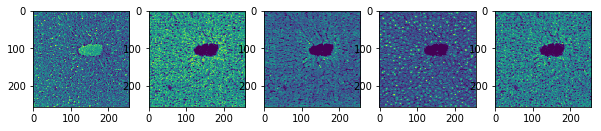

In [234]:
%matplotlib inline
# dic_model.fit_transform(np.transpose(test_sample_high))
num_components=5
plt.figure(figsize=(10,10))
for i in range(num_components):
    plt.subplot(1,num_components,i+1)
    plt.imshow(dic_model.components_[i,:].reshape(256,256))

In [225]:
cor_mat[matters_list_high==125.02,:]

array([[    0.        ,     0.        , 10248.89985898,  2090.42262578]])

In [214]:
np.where(np.sum(cor_mat==0,axis=1)==3)

(array([196]),)

In [215]:
matters_list_high[196]

390.31

In [236]:
pre_computed_dict = []
pre_computed_dict.append(test_sample_high[:,matters_list_high==125.02])
pre_computed_dict.append(test_sample_high[:,matters_list_high==86.24])
pre_computed_dict.append(test_sample_high[:,matters_list_high==62.13])
pre_computed_dict = np.array(pre_computed_dict)[:,:,0]
pre_computed_dict.shape

(3, 65536)

In [239]:
sc_model=SparseCoder(dictionary=pre_computed_dict,n_jobs=-1,positive_code=True,transform_algorithm='lasso_lars')

In [240]:
sc_cor_mat = sc_model.fit_transform(np.transpose(test_sample_high))

In [268]:
sc_cor_mat[matters_list_high==85.17,:]

array([[0.05539702, 0.09139015, 0.04209407]])

In [254]:
comp_sum = np.dot(np.transpose(pre_computed_dict),np.transpose(sc_cor_mat))

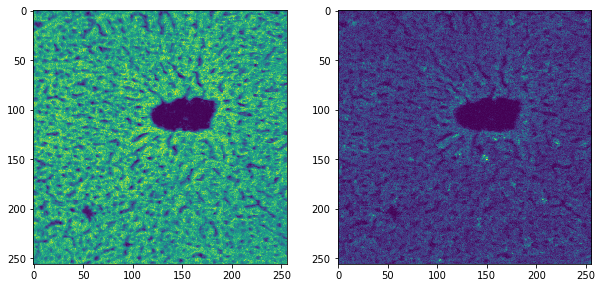

In [269]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(comp_sum[:,matters_list_high==85.17].reshape(256,256))
plt.subplot(1,2,2)
plt.imshow(test_sample_high[:,matters_list_high==85.17].reshape(256,256))

In [272]:
true_profile = test_sample_high[:,matters_list_high==85.17]

In [273]:
sum_profile = comp_sum[:,matters_list_high==85.17]

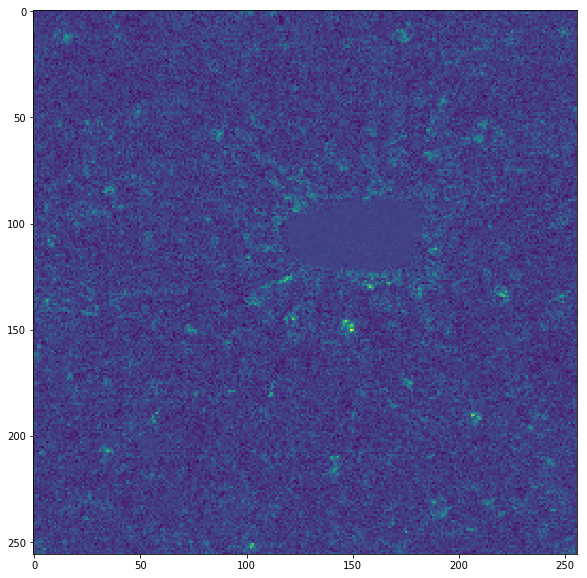

In [274]:
plt.figure(figsize=(10,10))
plt.imshow((true_profile-sum_profile).reshape(256,256))

In [276]:
(true_profile-sum_profile).max()

60.97434689856829

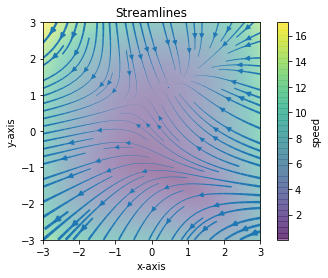

In [303]:
L = 3
Y, X = np.mgrid[-L:L:100j, -L:L:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

plt.imshow(speed, extent=[-L, L, -L, L], alpha=0.5)
plt.colorbar(label='speed')

plt.streamplot(X, Y, U, V, linewidth=0.2*speed)

plt.title('Streamlines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

In [304]:
U.shape

(100, 100)

In [286]:
a=np.mgrid[-L:L:100j, -L:L:100j]

In [288]:
a

array([[[-3.        , -3.        , -3.        , ..., -3.        ,
         -3.        , -3.        ],
        [-2.93939394, -2.93939394, -2.93939394, ..., -2.93939394,
         -2.93939394, -2.93939394],
        [-2.87878788, -2.87878788, -2.87878788, ..., -2.87878788,
         -2.87878788, -2.87878788],
        ...,
        [ 2.87878788,  2.87878788,  2.87878788, ...,  2.87878788,
          2.87878788,  2.87878788],
        [ 2.93939394,  2.93939394,  2.93939394, ...,  2.93939394,
          2.93939394,  2.93939394],
        [ 3.        ,  3.        ,  3.        , ...,  3.        ,
          3.        ,  3.        ]],

       [[-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        ...,
        [-3.        , -2.93939394, -2.87878788, ...,  

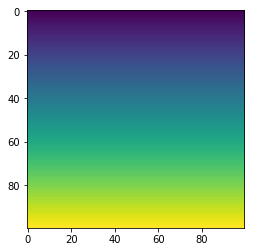

In [290]:
plt.imshow(Y)

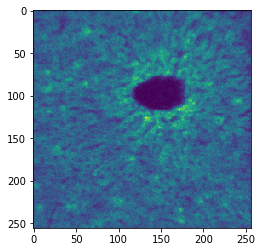

In [317]:
im=get_img(59.01,test_sample_all=test_sample_low,matter_list=matters_list_low)
plt.imshow(im)

In [294]:
a=np.gradient(im)

In [323]:
tmp_path = '/home/yzy/bioSIMS/tmp/'
dog_input = cv2.imread(tmp_path+'dog_input.jpg',cv2.IMREAD_GRAYSCALE)
dog_smooth = cv2.imread(tmp_path+'dog_smooth1.jpg',cv2.IMREAD_GRAYSCALE)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [ 17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
         17.,  17.,  17.,  17.,  17.],
       [ 34.,  34.,  34.,  34.,  34.,  34.,  34.,  34.,  34.,  34.,  34.,
         34.,  34.,  34.,  34.,  34.],
       [ 51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,
         51.,  51.,  51.,  51.,  51.],
       [ 68.,  68.,  68.,  68.,  68.,  68.,  68.,  68.,  68.,  68.,  68.,
         68.,  68.,  68.,  68.,  68.],
       [ 85.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,
         85.,  85.,  85.,  85.,  85.],
       [102., 102., 102., 102., 102., 102., 102., 102., 102., 102., 102.,
        102., 102., 102., 102., 102.],
       [119., 119., 119., 119., 119., 119., 119., 119., 119., 119., 119.,
        119., 119., 119., 119., 119.],
       [136., 136., 136., 136., 136., 136., 136., 136., 136., 136., 136.,
        136., 136., 13

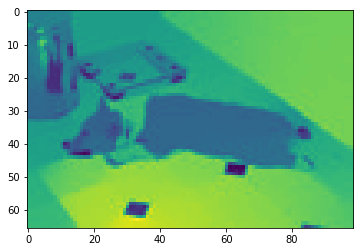

In [362]:
plt.imshow(dog_smooth)

In [366]:
speed.shape

(66, 99)

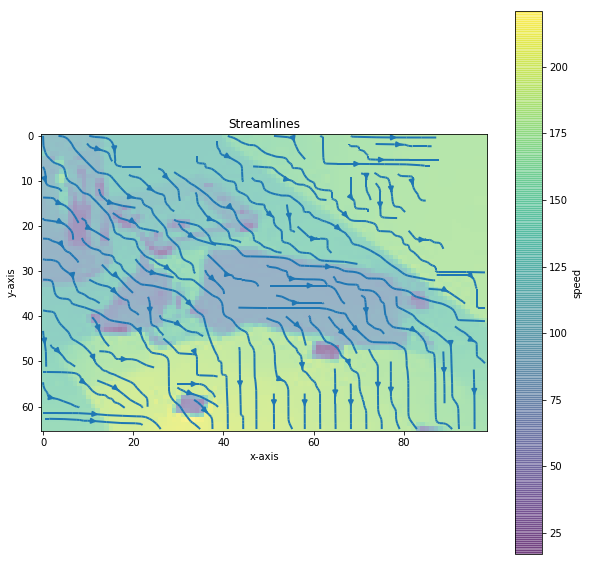

In [367]:
# L = 3
plt.figure(figsize=(10,10))
cur_im = dog_smooth
# Y, X = np.mgrid[0:255:16j, 0:255:16j]
Y, X = np.mgrid[0:65:66j, 0:98:99j]

# Y,X = np.mgrid([0:255:255j,0:255:255j])
# U = -1 - X**2 + Y
# V = 1 + X - Y**2
U,V=np.gradient(cur_im)
speed = np.sqrt(U*U + V*V)

plt.imshow(cur_im, alpha=0.5)
plt.colorbar(label='speed')

plt.streamplot(X, Y, U, V, linewidth=2,cmap='rocket')
# plt.streamplot(X, Y, U, V)

plt.title('Streamlines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

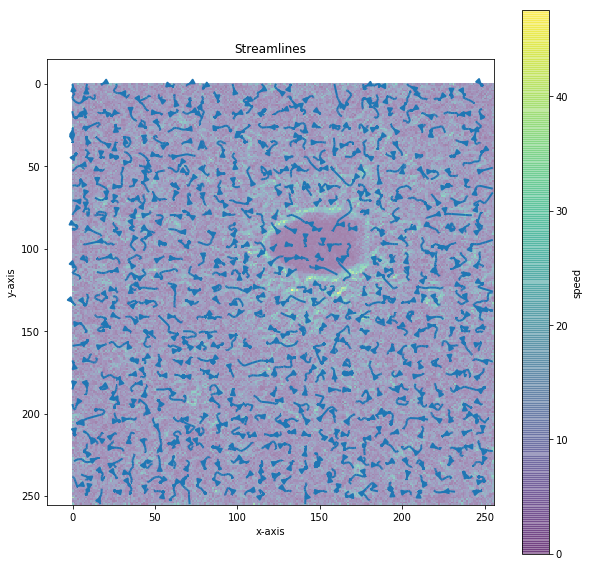

In [368]:
# L = 3
plt.figure(figsize=(10,10))

# Y, X = np.mgrid[0:255:16j, 0:255:16j]
Y, X = np.mgrid[0:255:256j, 0:255:256j]

# Y,X = np.mgrid([0:255:255j,0:255:255j])
# U = -1 - X**2 + Y
# V = 1 + X - Y**2
U,V=np.gradient(im[:,Y[:,0].astype('int')][Y[:,0].astype('int'),:])
speed = np.sqrt(U*U + V*V)

plt.imshow(speed, alpha=0.5)
plt.colorbar(label='speed')

plt.streamplot(X, Y, U, V, linewidth=2,cmap='rocket')
# plt.streamplot(X, Y, U, V)

plt.title('Streamlines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

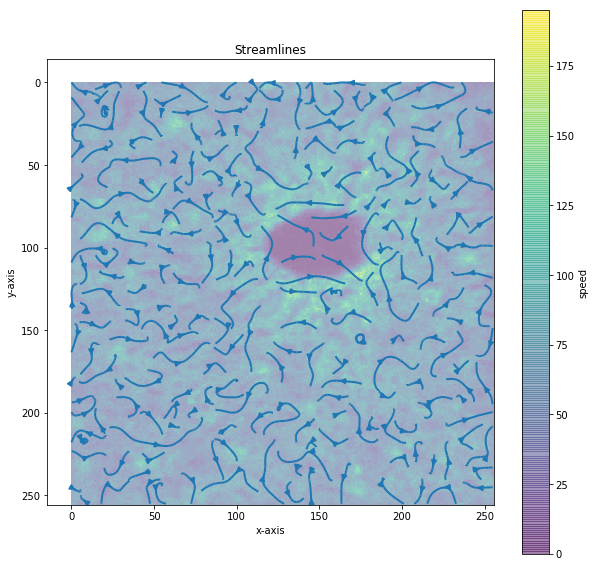

In [355]:
# L = 3
plt.figure(figsize=(10,10))

Y, X = np.mgrid[0:255:32j, 0:255:32j]
# Y, X = np.mgrid[0:255:256j, 0:255:256j]

# Y,X = np.mgrid([0:255:255j,0:255:255j])
# U = -1 - X**2 + Y
# V = 1 + X - Y**2
U,V=np.gradient(im[:,Y[:,0].astype('int')][Y[:,0].astype('int'),:])
speed = np.sqrt(U*U + V*V)

plt.imshow(im, alpha=0.5)
plt.colorbar(label='speed')

plt.streamplot(X, Y, U, V, linewidth=2,cmap='rocket')
# plt.streamplot(X, Y, U, V)

plt.title('Streamlines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

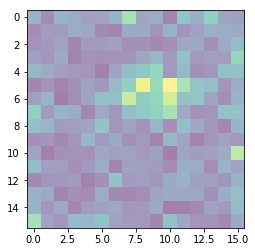

In [348]:
plt.imshow(speed, alpha=0.5)


# scanpy test

In [391]:
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

In [392]:
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4 anndata==0.6.18 numpy==1.16.2 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 


In [506]:
pbmc = sc.datasets.pbmc68k_reduced()

In [505]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [430]:
adata.var['aaa']=var

ValueError: Wrong number of items passed 0, placement implies 1

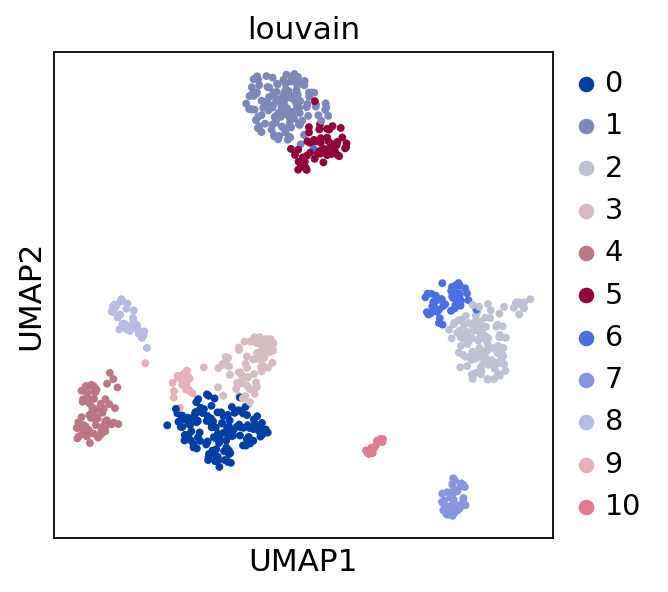

In [424]:
sc.pl.umap(pbmc, color=['louvain'], s=50)

In [495]:
# pbmc.var=pd.DataFrame(index=['p2524'+m for m in pbmc.var_names])
var_pd = pd.DataFrame(data={'index':['p2524'+m for m in pbmc.var_names]})
var_pd=var_pd.set_index('index')
pbmc.var=var_pd


In [572]:
pbmc.obs

bulk_labels  n_genes  percent_mito  \
index                                                                   
AAAGCCTGGCTAAC-1                CD14+ Monocyte     1003      0.023856   
AAATTCGATGCACA-1                     Dendritic     1080      0.027458   
AACACGTGGTCTTT-1                      CD56+ NK     1228      0.016819   
AAGTGCACGTGCTA-1               CD4+/CD25 T Reg     1007      0.011797   
ACACGAACGGAGTG-1                     Dendritic     1178      0.017277   
ACAGTTCTTAGCCA-1                       CD19+ B     1531      0.022347   
ACATTCTGACTACG-1                     Dendritic     1036      0.017159   
ACCCTCGAGTGAGG-1                     Dendritic     1250      0.010741   
ACTGGCCTTTTCGT-1              CD8+ Cytotoxic T     1282      0.018118   
ACTTGGGAACCAGT-1                CD14+ Monocyte     1063      0.020890   
AGAAAGTGTGAACC-1              CD8+ Cytotoxic T     1102      0.016106   
AGATATTGACCACA-1           CD4+/CD45RO+ Memory     1078      0.012831   
AGTAAGGATTTACC-1                       CD19+ B     1218      0.019780   
AGTTAAACAAACAG-1                       CD19+ B     1005      0.019806   
ATAACAACCTCTAT-1                CD14+ Monocyte     1053      0.008743   
ATGGACACAAGTGA-1                       CD19+ B     1092      0.015287   
ATGGACACTCGTTT-1                     Dendritic     1198      0.028549   
ATGGGTACCTGGTA-1  CD8+/CD45RA+ Naive Cytotoxic     1232      0.015884   
ATGTAAACTTTCGT-1               CD4+/CD25 T Reg     1351      0.024873   
ATTAACGATACGAC-1                CD14+ Monocyte     1031      0.013256   
ATTAGATGGGGAGT-1                     Dendritic     1016      0.018737   
ATTCCAACCCCAAA-1                CD14+ Monocyte     1253      0.025517   
CAAATTGACGTGAT-1                     Dendritic     1571      0.014843   
CACCGTACGCTGTA-1                     Dendritic     1523      0.017722   
CACTATACGCGATT-1  CD8+/CD45RA+ Naive Cytotoxic     1178      0.014354   
CACTTAACCAAAGA-1                     Dendritic     1507      0.011420   
CAGATGACATGTCG-1               CD4+/CD25 T Reg     1595      0.027624   
CAGGAACTACCACA-1                CD14+ Monocyte     1074      0.012676   
CATCCCGATCTCAT-1                     Dendritic     1105      0.025213   
CATCCCGATCTGGA-1                     Dendritic     1160      0.020500   
...                                        ...      ...           ...   
GTAGCCCTACGACT-8    CD4+/CD45RA+/CD25- Naive T     1132      0.013831   
GTAGCTGAGGAACG-8                       CD19+ B     1184      0.016250   
GTAGTGTGTCAAGC-8               CD4+/CD25 T Reg     1865      0.022930   
GTCACCTGTGGGAG-8                         CD34+     1507      0.020926   
GTCCAGCTGAACCT-8                     Dendritic     1483      0.012562   
GTGGTAACACCCAA-8                       CD19+ B     1221      0.016618   
GTTATAGACTCCAC-8                CD14+ Monocyte     1020      0.019141   
TAACTAGATATGGC-8                CD14+ Monocyte     1002      0.025200   
TAACTCACTGGAGG-8               CD4+/CD25 T Reg     1080      0.015004   
TAAGAACTTCCCAC-8                       CD19+ B     1126      0.017388   
TACATCACGCGATT-8                     Dendritic     1346      0.007266   
TACGAGACCCGATA-8                       CD19+ B     1041      0.016949   
TACGCAGATGGTTG-8                      CD56+ NK     1162      0.013367   
TACTCCCTGTACGT-8               CD4+/CD25 T Reg     1180      0.014295   
TACTTTCTAGAGAT-8                CD14+ Monocyte     1023      0.022597   
TAGCCCACTTTCTG-8                     Dendritic     1105      0.013290   
TAGCCCTGGAGGAC-8              CD8+ Cytotoxic T     1019      0.018093   
TAGTTAGAAACAGA-8                       CD19+ B     1028      0.022953   
TATAGCCTTTCAGG-8  CD8+/CD45RA+ Naive Cytotoxic     1102      0.018367   
TCAATCACCCTTCG-8                       CD19+ B     1139      0.018467   
TCTGATACGGTCTA-8                     Dendritic     1048      0.012697   
TGACGCCTCTCAGA-8                     Dendritic     1035      0.018449   
TGACTTACGGTCTA-8    

In [529]:
pbmc.var.index

Index(['HES4', 'TNFRSF4', 'SSU72', 'PARK7', 'RBP7', 'SRM', 'MAD2L2', 'AGTRAP',
       'TNFRSF1B', 'EFHD2',
       ...
       'ATP5O', 'MRPS6', 'TTC3', 'U2AF1', 'CSTB', 'SUMO3', 'ITGB2', 'S100B',
       'PRMT2', 'MT-ND3'],
      dtype='object', name='index', length=765)

filtered out 394 cells that have less than 1 counts


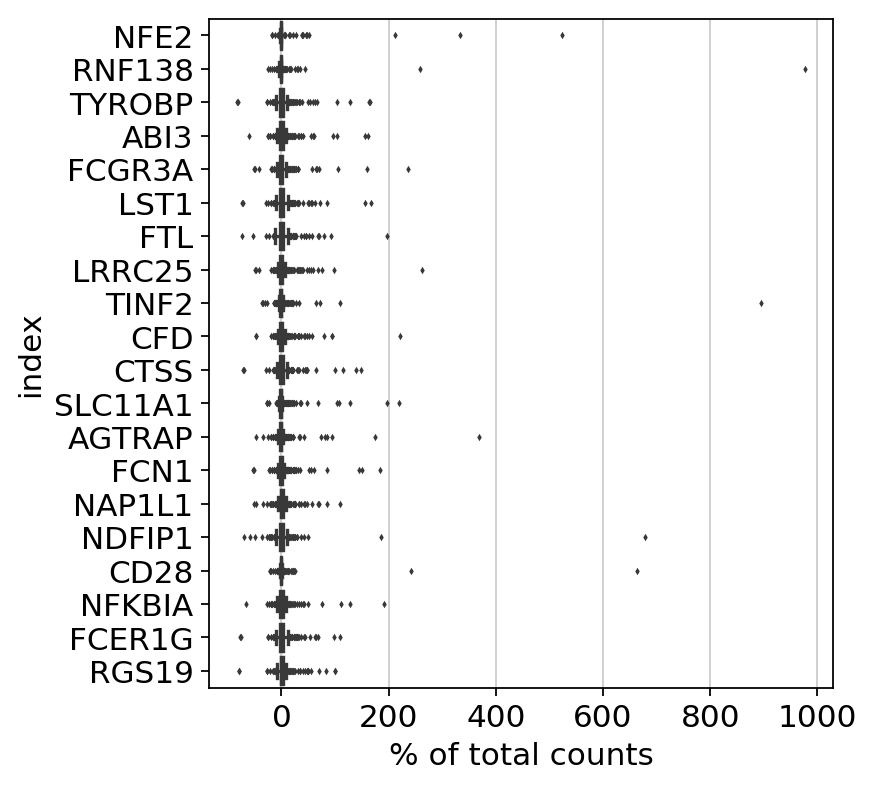

In [518]:
sc.pl.highest_expr_genes(pbmc, n_top=20)

In [576]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [507]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ',  'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'FCER1A', 'CST3']
# marker_genes = ['p2524'+m for m in marker_genes]

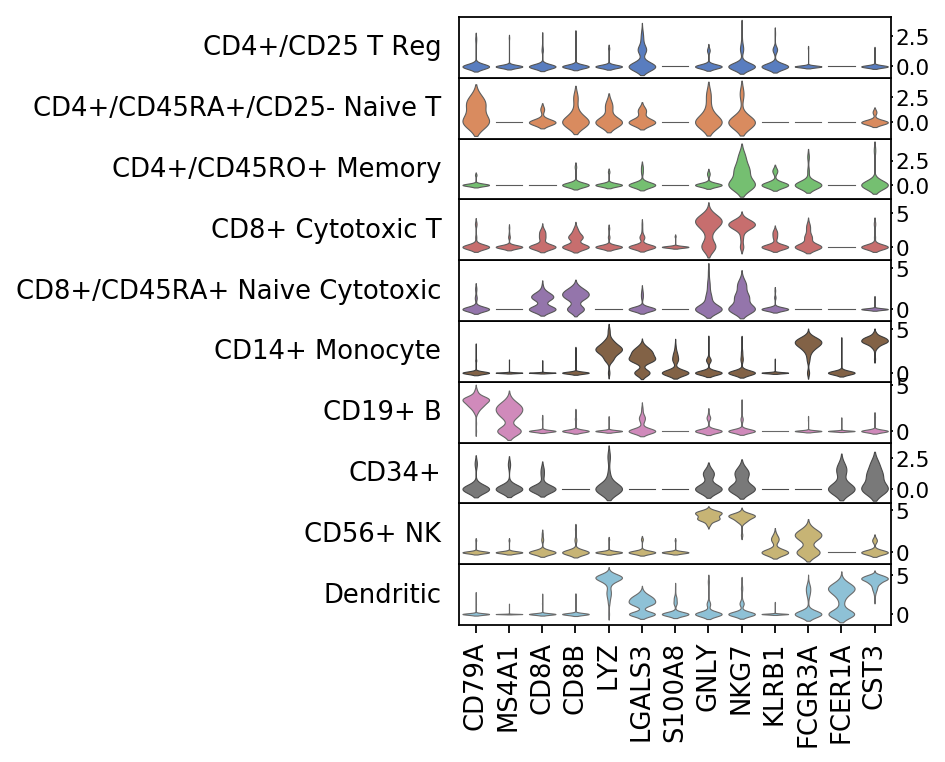

In [575]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels',)

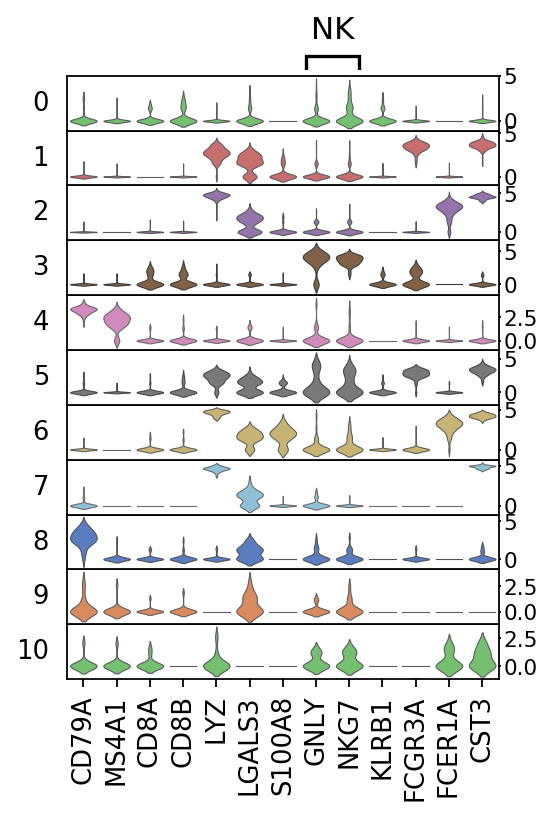

In [427]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='louvain',
                         var_group_positions=[(7, 8)], var_group_labels=['NK'])

In [610]:
# number of observations
# n_obs = 1000
# say we measure the time of observing the data points
# add them to a dataframe for storing some annotation
obs = pd.DataFrame()
obs['time'] = [str(y) for y in pbmc.obs['bulk_labels'].copy()]
# set the names of variables/features to the following
# ['A', 'B', 'C', ..., 'AA', 'BB', 'CC', ..., 'AAA', ...]
from string import ascii_uppercase
var_names = [str(m) for m in pbmc.var.index]

# var_names = [m+'25.24' for m in pbmc.var.index]
# number of variables
n_vars = len(var_names)
n_obs = len(obs)
# dataframe for annotating the variables
var = pd.DataFrame(index=var_names)
# the data matrix of shape n_obs x n_vars
X =  np.arange(n_obs*n_vars).reshape(n_obs, n_vars)

In [611]:
adata = ad.AnnData(X, obs=obs, var=var, dtype='double')


In [614]:
adata.raw

Divergent color map has been automatically set to plot non-raw data. Use `vmin`, `vmax` and `cmap` to adjust the plot.


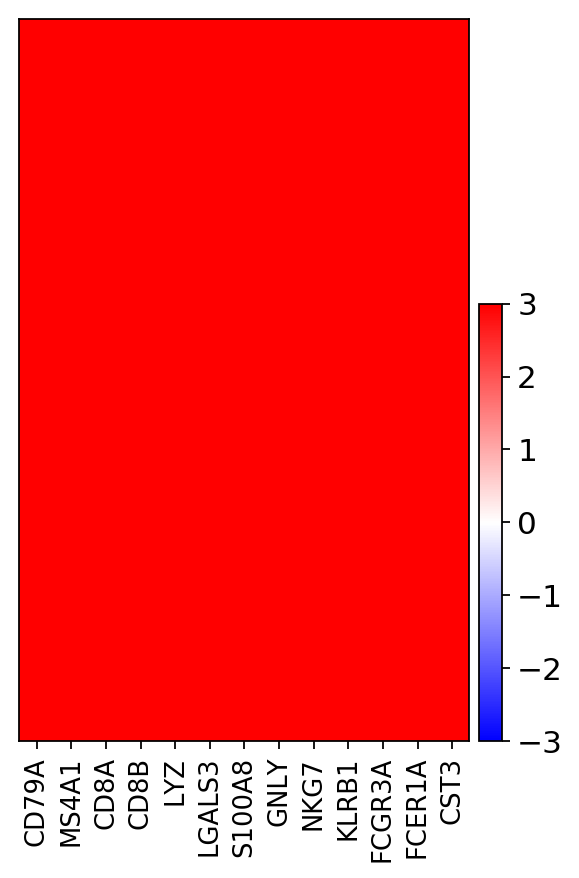

In [615]:
ax = sc.pl.heatmap(adata,var_names=marker_genes)

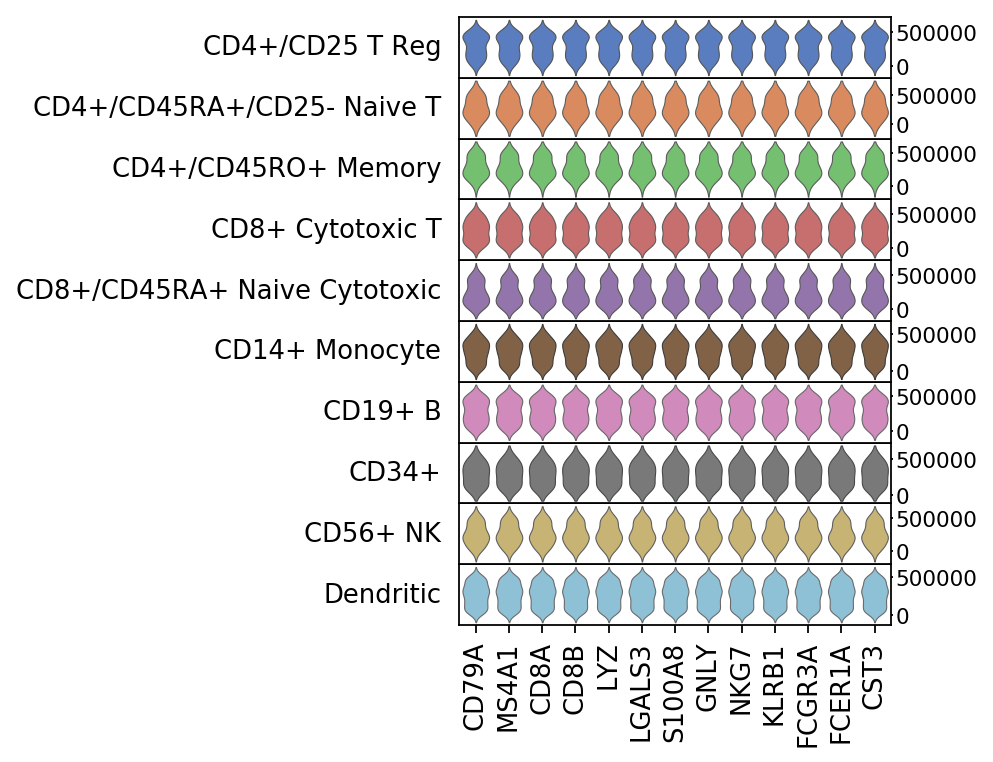

In [613]:
ax = sc.pl.stacked_violin(adata, marker_genes, groupby='time',)

Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 


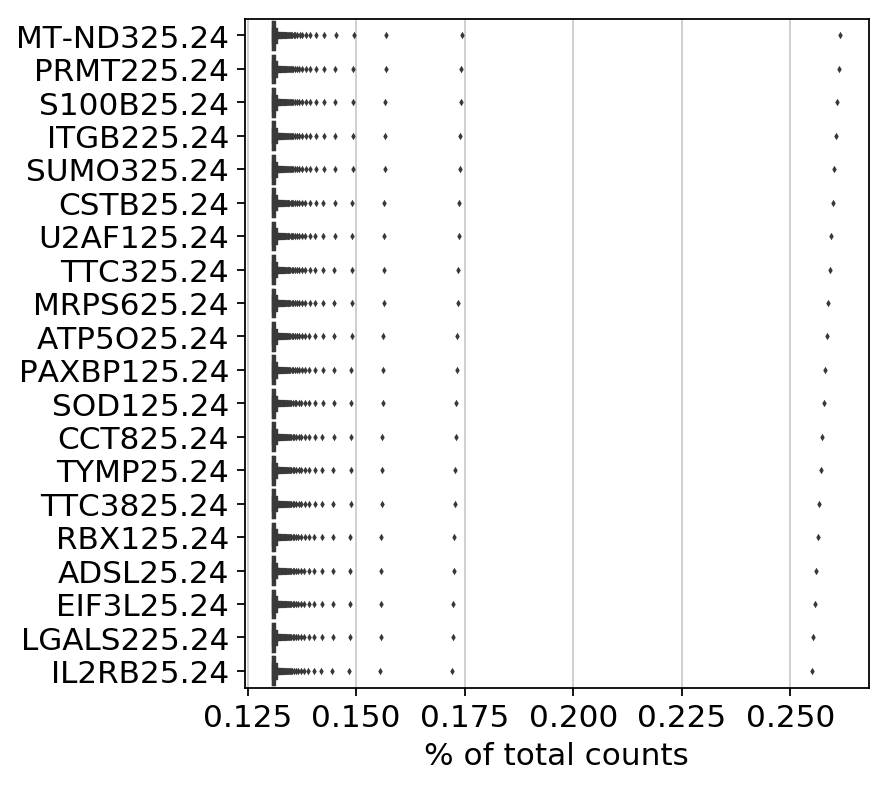

In [579]:
sc.pl.highest_expr_genes(adata, n_top=20)

# scanpy test end